In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import dftModel as DFT

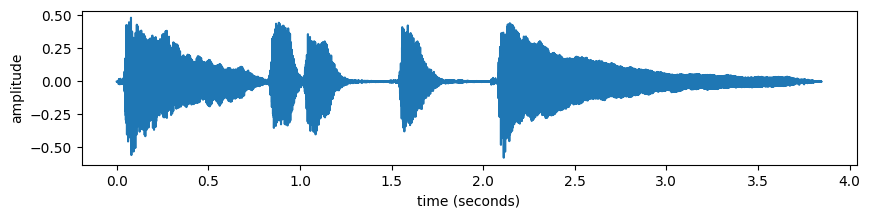

In [2]:
inputFile = '../sounds/piano.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

Text(0.5, 0, 'time (sec)')

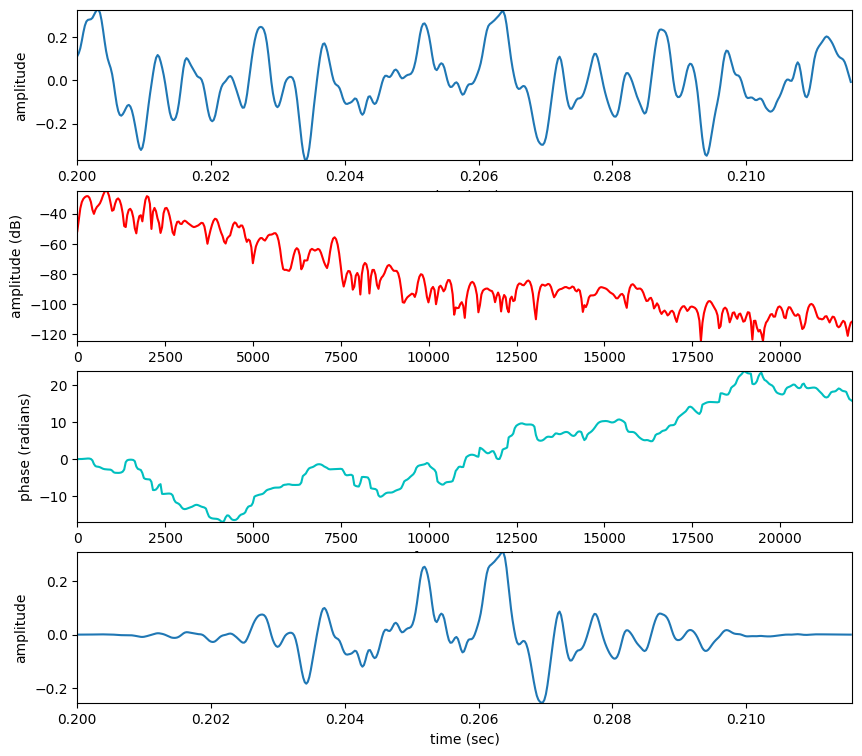

In [3]:
window = 'blackman'
M = 511
N = 1024
time = .2

w = get_window(window, M)
sample = int(time*fs)
x1 = x[sample:sample+M]
mX, pX = DFT.dftAnal(x1, w, N)
y = DFT.dftSynth(mX, pX, w.size)*sum(w)

plt.figure(figsize=(10, 9))
plt.subplot(4,1,1)
plt.plot(time + np.arange(M)/float(fs), x1)
plt.axis([time, time + M/float(fs), min(x1), max(x1)])
plt.ylabel('amplitude')
plt.xlabel('time (sec)')
plt.subplot(4,1,2)
plt.plot(float(fs)*np.arange(mX.size)/float(N), mX, 'r')
plt.axis([0, fs/2.0, min(mX), max(mX)])
plt.ylabel('amplitude (dB)')
plt.xlabel('frequency (Hz)')
plt.subplot(4,1,3)
plt.plot(float(fs)*np.arange(pX.size)/float(N), pX, 'c')
plt.axis([0, fs/2.0, min(pX), max(pX)])
plt.ylabel('phase (radians)')
plt.xlabel('frequency (Hz)')
plt.subplot(4,1,4)
plt.plot(time + np.arange(M)/float(fs), y)
plt.axis([time, time + M/float(fs), min(y), max(y)])
plt.ylabel('amplitude')
plt.xlabel('time (sec)')